In [1]:
URL = 'https://www.indeed.fr/jobs?q=data+science&l=Paris&start=0'

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
## YOUR CODE HERE
r = requests.get(URL)

soup = BeautifulSoup(r.text, 'html.parser')

jobs = soup.find_all(name='div', attrs={'class':"result"})

In [4]:
def extract_company_from_result(html):
    try:
        return html.find("span",{"class":"company"}).text
    except:
        return None

In [5]:
def extract_salary_from_result(html):
    try:
        html = html.find("span",{"class":"no-wrap"}).text
        return html.replace(u'\xa0', '')
    except:
        return None

In [6]:
def extract_location_from_result(html):   
    try:
        return html.find("span",{'class':'location'}).text
    except:
        return None

In [7]:
def extract_job_from_result(html):
    try:
        return html.find("a").text
    except:
        return None

In [8]:
url_template = "https://www.indeed.fr/jobs?q=data+science&l={}&start={}"
max_results_per_city = 2000
results = []

for city in ['Paris', 'Courbevoie','Levallois-Perret','Puteaux','Asnières-sur-seine','Nanterre','Boulogne-Billancourt']:
    for start in tqdm(range(0, max_results_per_city, 10)):
        r1 = requests.get(url_template.format(city,start))

        soup = BeautifulSoup(r1.text, 'html.parser')

        jobs = soup.find_all(name='div', attrs={'class':"result"}) # Grab the results from the request (as above)
        results.extend(jobs) # Append to the full set of results

100%|██████████| 200/200 [01:59<00:00,  1.68it/s]


In [78]:
## YOUR CODE HERE
dflist = [{"job_title":extract_job_from_result(result),"company":extract_company_from_result(result),
      "location":extract_location_from_result(result),"salary":extract_salary_from_result(result)} for result in results]


In [79]:
#df1=df.replace({'\n':''}, regex=True)
#df.replace(to_replace="\n",value="",regex=False,inplace=True)
#df = df.replace("\n", "")
#df1 = [df.replace("\n", "") for df in df1]
#df.replace({'\n': ''})
import pandas as pd
df=pd.DataFrame(dflist)
df = df.replace({'\n':''}, regex=True)
df['salary'] = df['salary'].str.replace(" 0", "0")
df.head(10)

,job_title,company,location,salary
0,STAGE DATA SCIENCE (H/F),Epsilon France,None,1300 € par mois
1,STAGE - Data Scientist (Deep Learning) H/F,Groupement Les Mousquetaires - AI,None,None
2,Developer full stack - React/Ruby/Elixir - On ...,HumanRaise,None,60000 € par an
3,Senior Manager Data Consulting – Secteur PRODU...,Accenture,None,None
4,Commercial Sédentaire Immobilier - 50K€ (packa...,MeilleursAgents,None,None
5,Project Data Management,NES Global Talent,None,None
6,Junior Data Science / Machine Learning Enginee...,Artur'In,Paris (75),None
7,"STAGE - Assistant(e) Data Science, EMEA H/F",Ubisoft,Paris (75),None
8,Stage - : Optimisation et data science pour le...,EDF,Paris (75),None
9,Stage - R&I - Data Science/Machine learning - ...,L'Oreal,Paris (75),1250 € par mois


In [80]:
df.to_csv("master1_df.csv")

In [81]:
## YOUR CODE HERE
df1= df.replace({'\n':''}, regex=True)
#df1 = df1[df1['job_title'].str.contains('NaN', na=False)]['Status']
#df1=df1.loc[df.str.contains("NaN", na=False)]
#df1=df1.loc[df.str.contains("NA", na=False)]
df.job_title.str.contains("NaN", na=False)
df1 = df.loc[~df['salary'].isnull()].drop_duplicates()
df2 = df1.loc[df1.salary.str.contains("an")]
#df2= df1.replace({'par':''}, regex=True)
#df2= df1.replace({'an':''}, regex=True)
df2.head(50)

,job_title,company,location,salary
2,Developer full stack - React/Ruby/Elixir - On ...,HumanRaise,None,60000 € par an
17,Data scientist H/F,Fed IT,None,50000 € - 60000 € par an
50,Data Engineer - H/F,RTE - Réseau de Transport d'Electricité,None,47000 € par an
52,Senior Data Scientist – Start Up Fintech - H/F,EASY PARTNER,None,85000 € par an
58,DATA SCIENTIST-ENGINEERS,Axance,Paris 18e (75),42000 € par an
85,Data Scientist - Plateforme pour les étudiants...,Easy Partner,None,55000 € - 65000 € par an
150,[CDI] Data Scientist-Engineer (F&H),Axance Technology,Paris 18e (75),42000 € par an
200,Directeur Data Science pour porter l'offre dat...,Data Recrutement,Paris (75),120000 € - 140000 € par an
264,Data Engineer,Neoxia,Paris (75),45000 € - 55000 € par an
269,Lead Technique Data Science,Harnham US,Paris (75),60000 € - 70000 € par an


In [82]:
import string

def extract_number(salary):
    #salary = str(salary).translate({ord(c): None for c in string.whitespace})
    salary = str(salary).replace(",","").replace("€","").replace("-","")
    #salary =str(salary).replace("par","").replace("an","")
    #list=[]
    #list=salary.split(" ")
    #salary="".join(list)
    #salary=int(salary)
    salary = [int(s) for s in salary.split() if s.isdigit()]
    if len(salary)>1:
        salary = (sum(salary)/2)
    else:
        salary = (sum(salary))
    return salary

extract_number("50000 € - 60000 € par an")
#extract_number("50 000 € - 55 000 € par an")
#extract_number("44 000 € - 50 000 € par an")
#extract_number("60 000 € - 70 000 € par an")
#extract_number("50 000 € - 55 000 € par an")
#extract_number("55 000 € - 65 000 € par an")
#extract_number("85 000 € par an")
#extract_number("60 000 € par an")
#extract_number("42 000 € par an")

55000.0

In [83]:
df2['salary'] = df2['salary'].map(extract_number)
#df2['salary'] = df2['salary']*1000
df2.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,job_title,company,location,salary
2,Developer full stack - React/Ruby/Elixir - On ...,HumanRaise,None,60000.0
17,Data scientist H/F,Fed IT,None,55000.0
50,Data Engineer - H/F,RTE - Réseau de Transport d'Electricité,None,47000.0
52,Senior Data Scientist – Start Up Fintech - H/F,EASY PARTNER,None,85000.0
58,DATA SCIENTIST-ENGINEERS,Axance,Paris 18e (75),42000.0
85,Data Scientist - Plateforme pour les étudiants...,Easy Partner,None,60000.0
150,[CDI] Data Scientist-Engineer (F&H),Axance Technology,Paris 18e (75),42000.0
200,Directeur Data Science pour porter l'offre dat...,Data Recrutement,Paris (75),130000.0
264,Data Engineer,Neoxia,Paris (75),50000.0
269,Lead Technique Data Science,Harnham US,Paris (75),65000.0


In [84]:
df2.head(50)

,job_title,company,location,salary
2,Developer full stack - React/Ruby/Elixir - On ...,HumanRaise,None,60000.0
17,Data scientist H/F,Fed IT,None,55000.0
50,Data Engineer - H/F,RTE - Réseau de Transport d'Electricité,None,47000.0
52,Senior Data Scientist – Start Up Fintech - H/F,EASY PARTNER,None,85000.0
58,DATA SCIENTIST-ENGINEERS,Axance,Paris 18e (75),42000.0
85,Data Scientist - Plateforme pour les étudiants...,Easy Partner,None,60000.0
150,[CDI] Data Scientist-Engineer (F&H),Axance Technology,Paris 18e (75),42000.0
200,Directeur Data Science pour porter l'offre dat...,Data Recrutement,Paris (75),130000.0
264,Data Engineer,Neoxia,Paris (75),50000.0
269,Lead Technique Data Science,Harnham US,Paris (75),65000.0


In [85]:
## YOUR CODE HERE
df_master = df2.reset_index(drop=True)
df_master.to_csv("master_df.csv")

In [86]:
df_master = pd.read_csv("master_df.csv")

In [87]:
df_master.drop("Unnamed: 0",axis=1,inplace=True)

In [88]:
df_master.head()

,job_title,company,location,salary
0,Developer full stack - React/Ruby/Elixir - On ...,HumanRaise,NaN,60000.0
1,Data scientist H/F,Fed IT,NaN,55000.0
2,Data Engineer - H/F,RTE - Réseau de Transport d'Electricité,NaN,47000.0
3,Senior Data Scientist – Start Up Fintech - H/F,EASY PARTNER,NaN,85000.0
4,DATA SCIENTIST-ENGINEERS,Axance,Paris 18e (75),42000.0


In [89]:
df_master.job_title.unique()

array(['Developer full stack - React/Ruby/Elixir - On ne parle que d...',
       'Data scientist H/F', 'Data Engineer - H/F',
       'Senior Data Scientist – Start Up Fintech - H/F',
       'DATA SCIENTIST-ENGINEERS',
       'Data Scientist - Plateforme pour les étudiants (h/f)',
       '[CDI] Data Scientist-Engineer (F&H)',
       "Directeur Data Science pour porter l'offre data science",
       'Data Engineer', 'Lead Technique Data Science', 'Associate',
       'Gestionnaire middle office crédits particuliers F/H',
       'Big Data Engineer H/F (IoT, Scala, Spark, Kafka)',
       'Consultant data science on site pour un jeune cabinet de con...',
       'Data Scientist Senior (équipe big data et IA)',
       'Ingénieur Machine Learning |',
       'Ingénieur data scientist – Markplace référente', 'Data Miner',
       'Développeur(euse) Big Data (H/F)',
       'Data Analyst - Plateforme pour les étudiants (H/F)',
       'Data Scientist - Jeune Docteur', 'Consultant(e) (jeune diplômé)',


In [90]:
df_master.company.unique()

array(['HumanRaise', 'Fed IT', "RTE - Réseau de Transport d'Electricité",
       'EASY PARTNER', 'Axance', 'Easy Partner', 'Axance Technology',
       'Data Recrutement', 'Neoxia', 'Harnham US',
       'Forensic Risk Alliance', 'Bourse des crédits', 'Square Sense',
       'DRYFT', 'OCTOPUS IT', 'Konekt', 'AssessFirst', 'AKOYA', 'Seyos',
       'LR Associates Cabinet de conseil en Recrutement', 'Quinten',
       'PROFILE RESEARCH', 'FORTIA Financial Solutions', 'Dynacentrix',
       'Inserm', 'ARMIS', 'Expertime', 'Publifactory', 'Universcience',
       'ELYAS CONSEIL', 'Harnham', 'INSERM', 'Puce & Plume', 'KONEKT',
       'InUse', 'SEC Recruitment', 'Eramet', 'ESILV - Paris la Défense',
       'CLARINS FRANCE', 'BoursedesCredits.com',
       'European Society for bllod and marrow transplant (...',
       'Sept Lieues', 'Geny Consultant', 'POLYCONSEIL'], dtype=object)

In [91]:
categories = pd.DataFrame(columns=['Gouvernement','Education','Sante','Royal','Recrutement','Finance','Energie'])

In [92]:
job_words = pd.DataFrame(columns=['Directeur','Analyst','Scientist','Engineer','Business','Consultant','Senior',
                                  'Junior','Manager','Officer','Developer','Head of','Programmeur','Executive',
                                  'Java','Python','Lead','Intelligence','Machine Learning','Javascript','Developer',
                                  'Graduate','Recherche'])

In [93]:
df_master = pd.concat([df_master,categories,job_words],axis=1)

In [94]:
for key,value in categories.items():
    df_master[key] = df_master.company.map(lambda x: 1 if len(set(x.split()).intersection(set(value)))>0 else 0)

In [95]:
for job in job_words:
    df_master[job] = df_master['job_title'].map(lambda x: 1 if job in x else 0)

In [96]:
df_master['salary_band'] = df_master.salary.map(lambda x: "low" if x <= df_master.salary.quantile(0.5) else "high")

In [97]:
df_master.head(10)

,job_title,company,location,salary,Gouvernement,Education,Sante,Royal,Recrutement,Finance,...,Java,Python,Lead,Intelligence,Machine Learning,Javascript,Developer,Graduate,Recherche,salary_band
0,Developer full stack - React/Ruby/Elixir - On ...,HumanRaise,NaN,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,high
1,Data scientist H/F,Fed IT,NaN,55000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high
2,Data Engineer - H/F,RTE - Réseau de Transport d'Electricité,NaN,47000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low
3,Senior Data Scientist – Start Up Fintech - H/F,EASY PARTNER,NaN,85000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high
4,DATA SCIENTIST-ENGINEERS,Axance,Paris 18e (75),42000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low
5,Data Scientist - Plateforme pour les étudiants...,Easy Partner,NaN,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high
6,[CDI] Data Scientist-Engineer (F&H),Axance Technology,Paris 18e (75),42000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low
7,Directeur Data Science pour porter l'offre dat...,Data Recrutement,Paris (75),130000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high
8,Data Engineer,Neoxia,Paris (75),50000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low
9,Lead Technique Data Science,Harnham US,Paris (75),65000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,high


In [98]:
df_master.drop_duplicates(inplace=True)

In [99]:
df_master.shape

(74, 35)

In [100]:
final_df = df_master.copy()
final_df['salary_band'] = final_df.salary.map(lambda x: 0 if x <= final_df.salary.quantile(0.5) else 1)

In [101]:
## YOUR CODE HERE
print("Baseline Accuracy:",final_df.salary_band.value_counts().max()/sum(final_df.salary_band.value_counts()))

Baseline Accuracy: 0.5135135135135135


In [102]:
final_df.shape

(74, 35)

In [1]:
final_df.groupby(by="location").salary.mean().plot(figsize=(20, 6),kind="bar");

NameError: name 'final_df' is not defined

In [106]:
X = final_df['location']
y = final_df['salary_band']

In [107]:
X = pd.get_dummies(X) #dropping York in the predictors df, as this has the lowest mean salary as displayed above

In [108]:
#X.drop("York",inplace=True)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from scipy import stats
import statsmodels.formula.api as sm
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

lr = LogisticRegression()

lr.fit(X,y)

print(lr.score(X,y))

lr.coef_
lr.intercept_

0.6756756756756757


array([-0.33415721])

In [110]:
final_df.head()
predictor_df = final_df.copy()

In [111]:
predictor_df.columns
predictor_df.drop(['company','job_title','location'],axis=1,inplace=True)

In [112]:
predictor_df.drop('salary',axis=1,inplace=True)

In [113]:
predictor_df = pd.get_dummies(predictor_df)

In [114]:
y = predictor_df.pop('salary_band')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(predictor_df,y,test_size=0.3,random_state=2018)

In [116]:
cross_val_score(lr,X_train,y_train,cv=5).mean()

0.6472727272727273

In [117]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [118]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {'C':np.logspace(-5,5,50),
          'penalty':['l1','l2']}
lrgs = GridSearchCV(lr,params,verbose=1,cv=5)
lrgs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/auredata/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/auredata/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/auredata/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2'

/home/auredata/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/auredata/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/auredata/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/auredata/.local/

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 1.5...
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6

In [119]:
lrgs.best_params_

{'C': 2.0235896477251556, 'penalty': 'l2'}

In [120]:
lrgs.best_score_

0.6672727272727274

In [121]:
best_lr = lrgs.best_estimator_

In [122]:
coefficient_df = pd.DataFrame()
coefficient_df['Features'] = X_train.columns
coefficient_df['LR_Coefficients'] = best_lr.coef_[0]
coefficient_df['absolutes'] = abs(best_lr.coef_[0])

In [123]:
coefficient_df.sort_values(by='absolutes',ascending=False).head(10)

,Features,LR_Coefficients,absolutes
23,Lead,1.333894,1.333894
12,Consultant,-1.220624,1.220624
10,Engineer,1.140796,1.140796
13,Senior,0.976127,0.976127
15,Manager,-0.860937,0.860937
25,Machine Learning,0.823736,0.823736
7,Directeur,0.823736,0.823736
14,Junior,-0.546563,0.546563
29,Recherche,-0.257586,0.257586
9,Scientist,0.207569,0.207569


In [124]:
best_lr.score(X_test,y_test)

0.6086956521739131

In [125]:
predictions = best_lr.predict(X_test)
predictions_df = pd.DataFrame()
predictions_df['y_true'] = y_test
predictions_df['y_hat'] = predictions
predictions_df['prob_1'] = best_lr.predict_proba(X_test)[:,1]
predictions_df['70_percent_threshold'] = predictions_df['prob_1'].map(lambda x: 1 if x>0.7 else 0)
predictions_df.head(10)

,y_true,y_hat,prob_1,70_percent_threshold
35,0,0,0.389927,0
43,1,0,0.389927,0
73,1,1,0.676137,0
64,0,0,0.158659,0
45,0,1,0.666673,0
44,1,1,0.676137,0
65,1,1,0.676137,0
37,0,0,0.389927,0
19,0,0,0.389927,0
8,0,1,0.666673,0


In [126]:
from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, auc, average_precision_score

f1_score(y_test, predictions_df['70_percent_threshold'])

0.14285714285714288

In [127]:
from sklearn import metrics
fpr, tpr, thresh = roc_curve(y_test,predictions_df['prob_1'])
thresholds_df = pd.DataFrame()
thresholds_df['FPR'] = fpr
thresholds_df['TPR'] = tpr
thresholds_df['Thresholds'] = thresh
thresholds_df.iloc[:,:].head(5)

,FPR,TPR,Thresholds
0,0.0,0.000000,1.749105
1,0.0,0.076923,0.749105
2,0.0,0.461538,0.676137
3,0.3,0.538462,0.666673
4,0.3,0.615385,0.440274


In [128]:
prec, recall, thresh = precision_recall_curve(y_test,predictions_df['prob_1'])
prc_df = pd.DataFrame()
prc_df['Precision'] = prec[:-1]
prc_df['Recall'] = recall[:-1]
prc_df['Threshold'] = thresh

In [129]:
average_precision = average_precision_score(y_test, predictions_df['prob_1'])

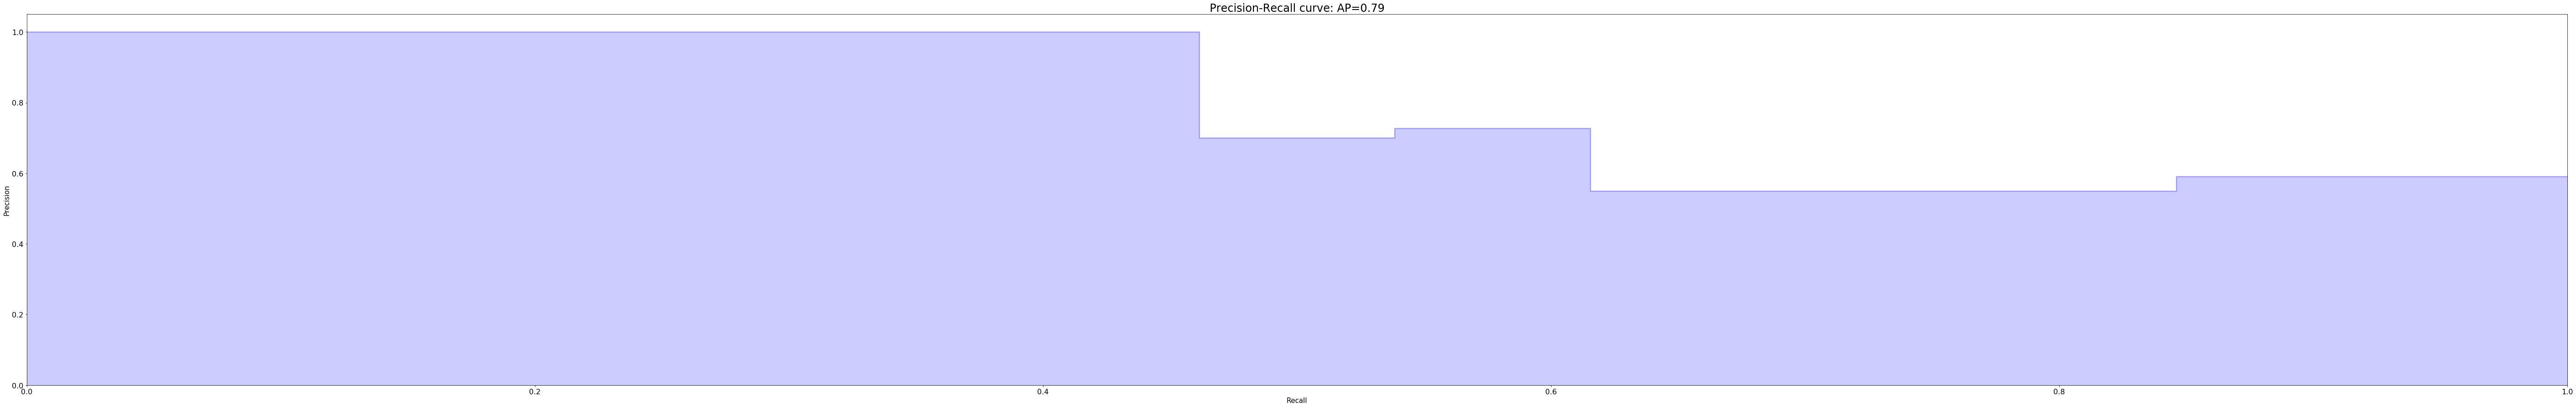

In [130]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.step(recall, prec, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, prec, step='post', alpha=0.2,
                 color='b')
plt.rcParams["figure.figsize"] = (60,15)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

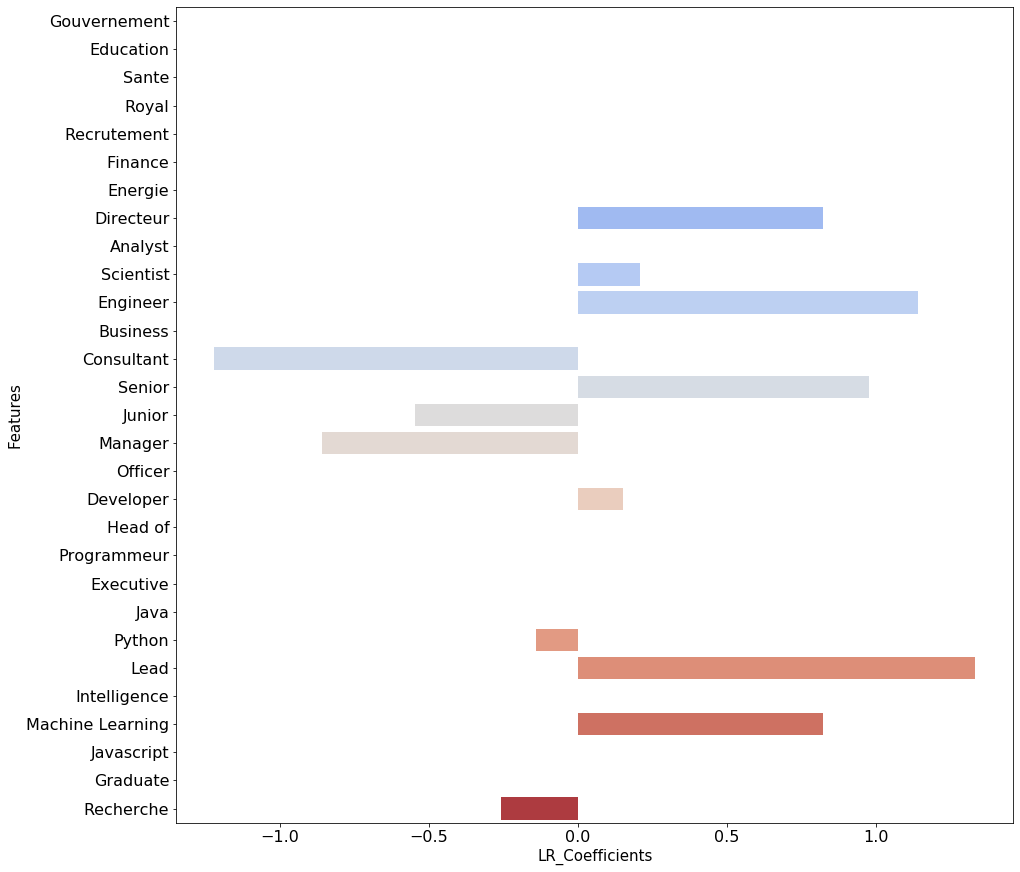

In [131]:
import seaborn as sns
fig,ax= plt.subplots(figsize=(15,15))
sns.barplot(y=coefficient_df.Features,x=coefficient_df.LR_Coefficients, orient='h', palette='coolwarm',ax=ax);

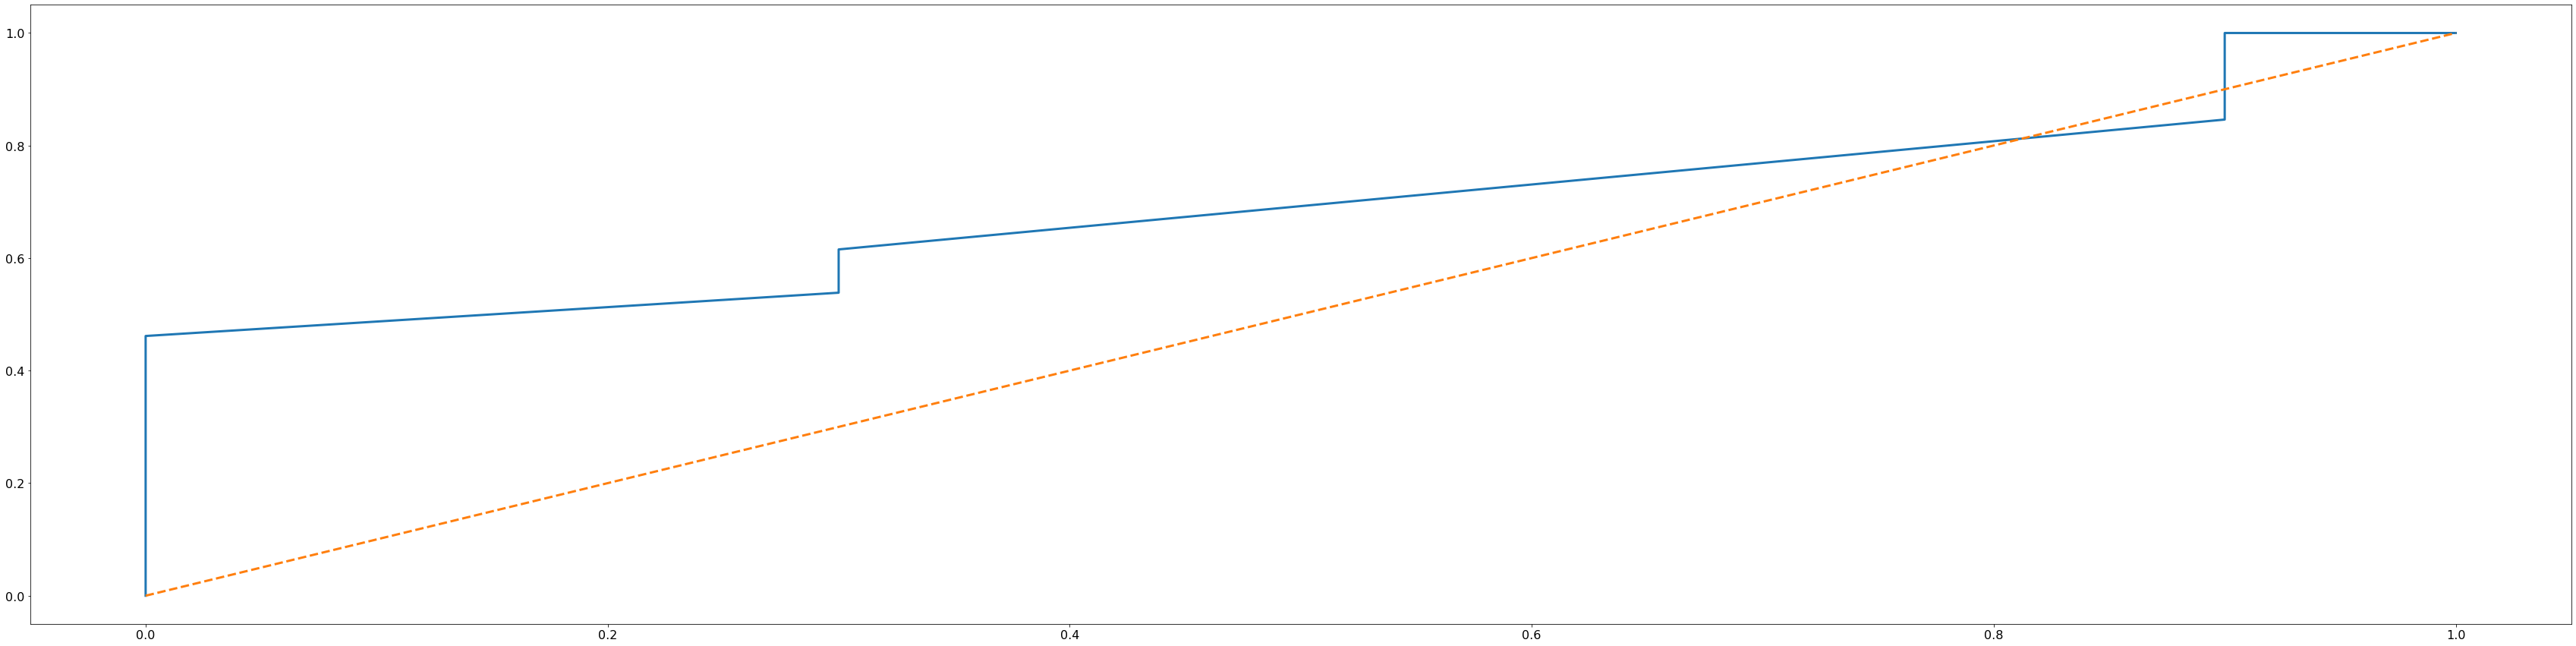

In [132]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--');

In [133]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5)
cross_val_score(rfc,X_train,y_train,cv=5).mean()

0.6672727272727274

In [134]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [135]:
X_train.shape

(51, 30)

In [136]:
params = {'max_depth':range(1,21),
          'max_features':["auto","log2",0.5],
         'criterion':['gini','entropy'],
         'bootstrap':[True,False],
         }
rfgs = GridSearchCV(rfc,params,verbose=1,cv=5)
rfgs.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [137]:
rfgs.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto'}

In [138]:
rfgs.best_score_

0.6872727272727273

In [139]:
best_rf = rfgs.best_estimator_

In [140]:
rf_coefficient_df = pd.DataFrame()
rf_coefficient_df['Features'] = X_train.columns
rf_coefficient_df['Feature_Importances'] = best_rf.feature_importances_

In [141]:
rf_coefficient_df.sort_values(by='Feature_Importances',ascending=False).head(10)

,Features,Feature_Importances
23,Lead,0.223105
12,Consultant,0.189142
10,Engineer,0.136241
13,Senior,0.122650
15,Manager,0.086293
7,Directeur,0.072182
14,Junior,0.054182
9,Scientist,0.042118
25,Machine Learning,0.038980
29,Recherche,0.026372


In [142]:
best_rf.score(X_test,y_test)

0.6086956521739131

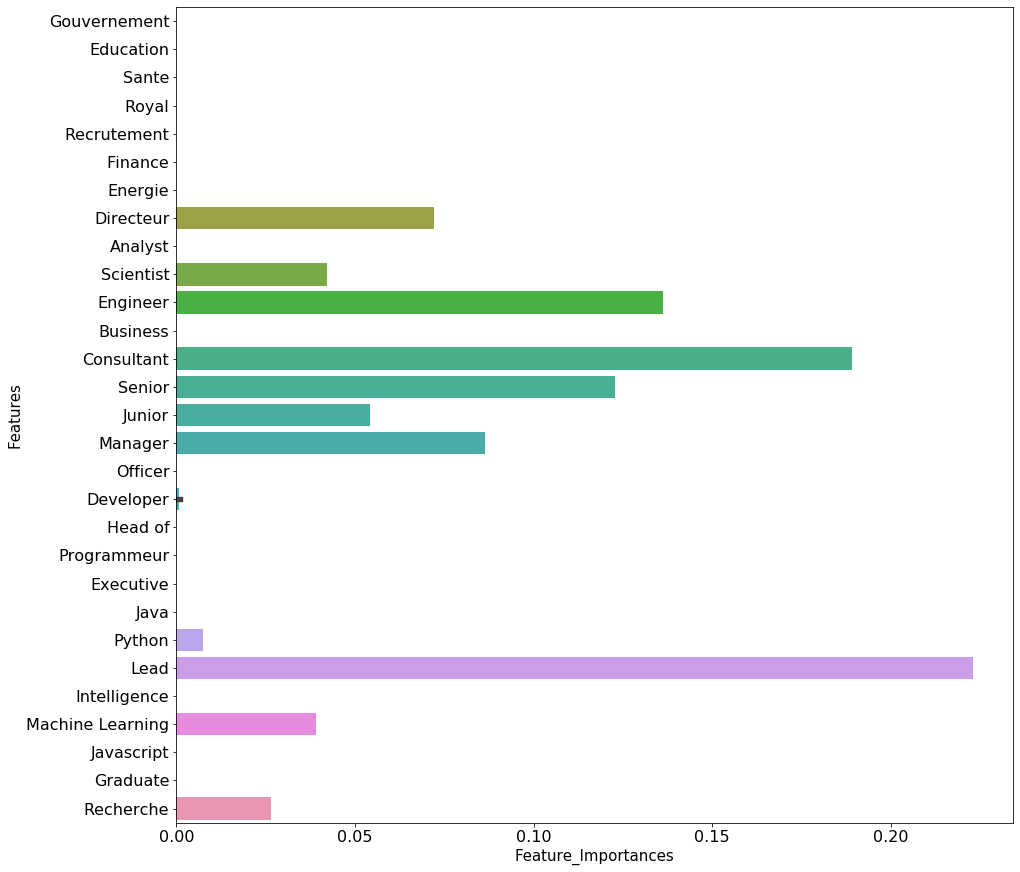

In [143]:
fig,ax= plt.subplots(figsize=(15,15))
sns.barplot(y=rf_coefficient_df.Features,x=rf_coefficient_df.Feature_Importances, orient='h',ax=ax);

In [144]:
predictions = best_rf.predict(X_test)
predictions_df = pd.DataFrame()
predictions_df['y_true'] = y_test
predictions_df['y_hat'] = predictions
predictions_df['prob_1'] = best_rf.predict_proba(X_test)[:,1]
predictions_df['70_percent_threshold'] = predictions_df['prob_1'].map(lambda x: 1 if x>0.7 else 0)
predictions_df.head(10)

,y_true,y_hat,prob_1,70_percent_threshold
35,0,0,0.430827,0
43,1,0,0.430827,0
73,1,1,0.559370,0
64,0,0,0.299708,0
45,0,1,0.523921,0
44,1,1,0.559370,0
65,1,1,0.559370,0
37,0,0,0.430827,0
19,0,0,0.430827,0
8,0,1,0.523921,0


In [145]:
f1_score(y_test, predictions_df['70_percent_threshold'])

0.0

In [146]:
fpr, tpr, thresh = roc_curve(y_test,predictions_df['prob_1'])
thresholds_df = pd.DataFrame()
thresholds_df['FPR'] = fpr
thresholds_df['TPR'] = tpr
thresholds_df['Thresholds'] = thresh

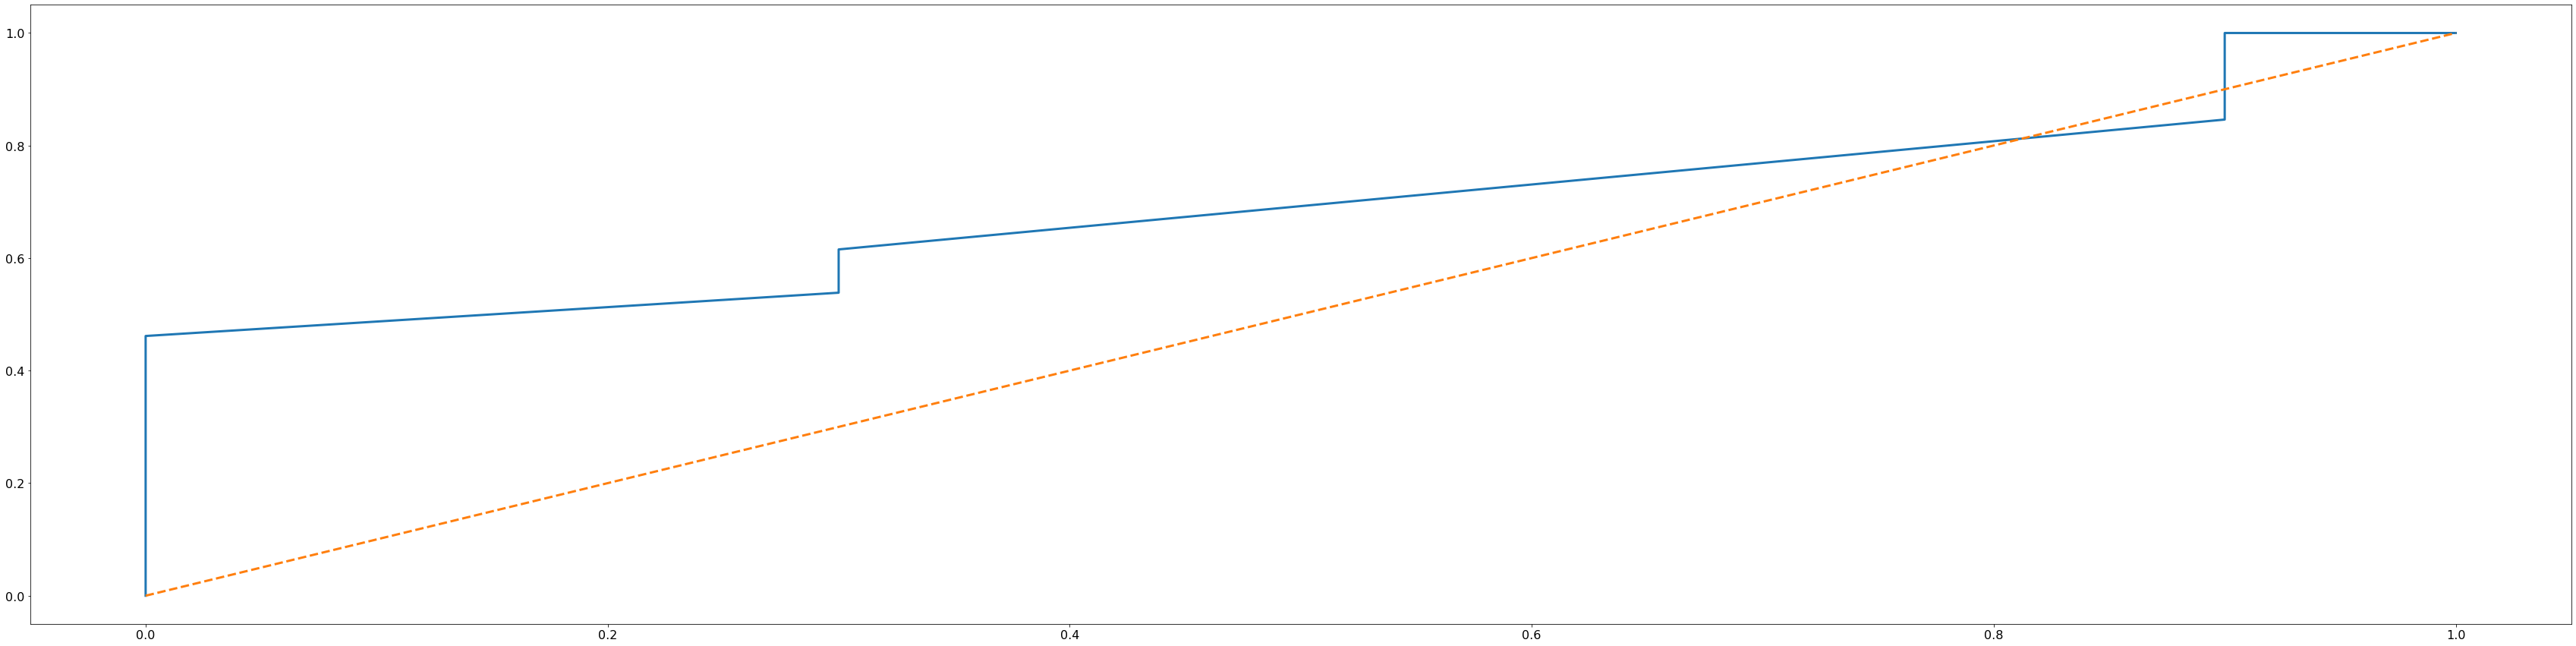

In [147]:
import matplotlib as mpl
plt.plot(fpr,tpr)
plt.rcParams["figure.figsize"] = (100,15)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.plot([0,1],[0,1],'--');